In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df =df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df =df.rename(columns={'v1':'target','v2':'text'})

In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.sample(6)

,target,text
3377,0,Hows that watch resizing
3608,0,Joy's father is John. Then John is the ____ of...
5458,0,"Sorry, I'll call later"
5480,0,Have you seen who's back at Holby?!
762,1,Urgent Ur å£500 guaranteed award is still uncl...
1740,1,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...


In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep="first",inplace=True)

In [16]:
df.shape

(5169, 2)

In [17]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

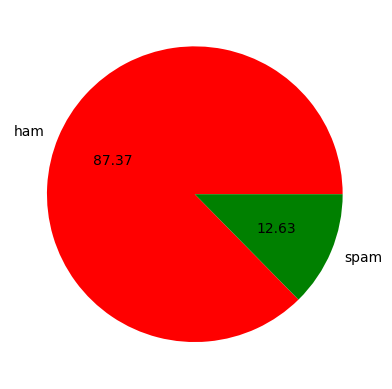

In [19]:
colors=['red','green']
labels=["ham",'spam']
plt.pie(df["target"].value_counts(),labels=labels,colors=colors,autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df["num_characters"] = df["text"].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

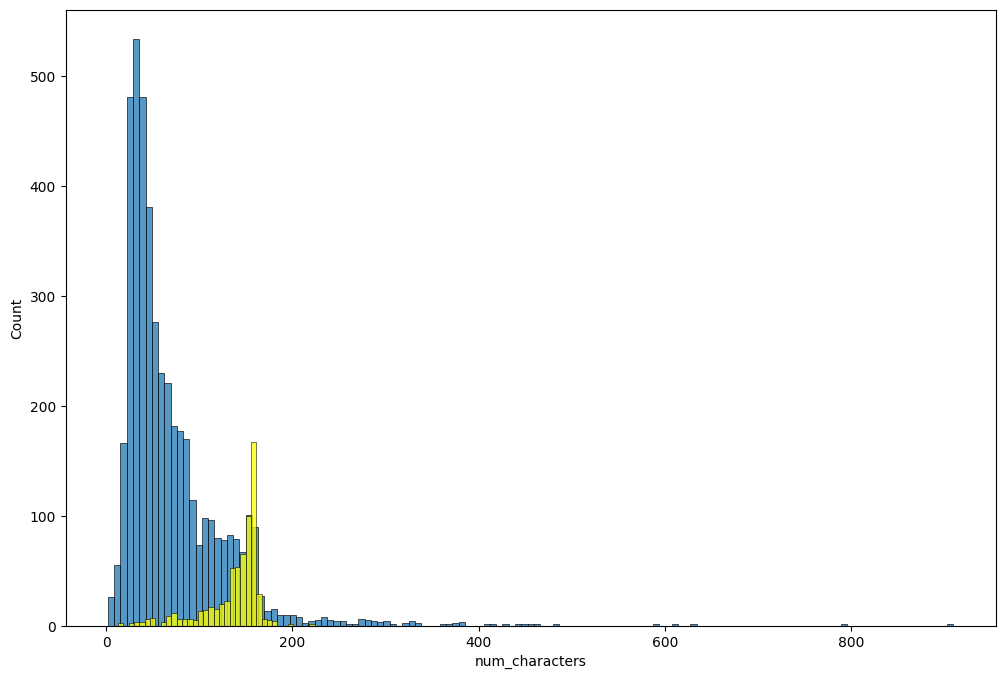

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"],color="yellow")

<Axes: xlabel='num_words', ylabel='Count'>

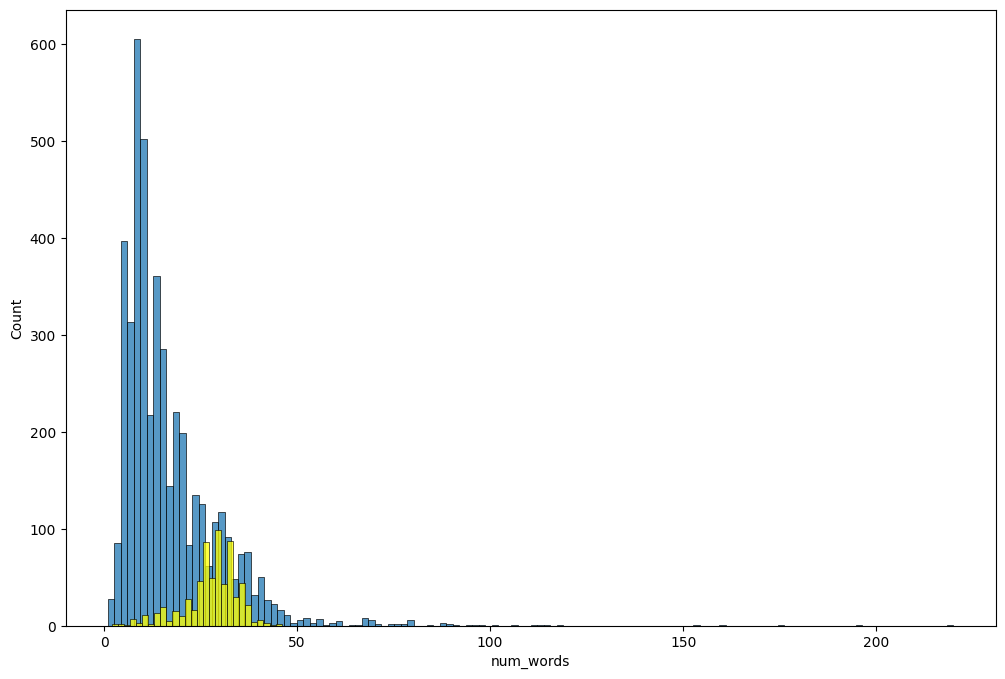

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"],color="yellow")

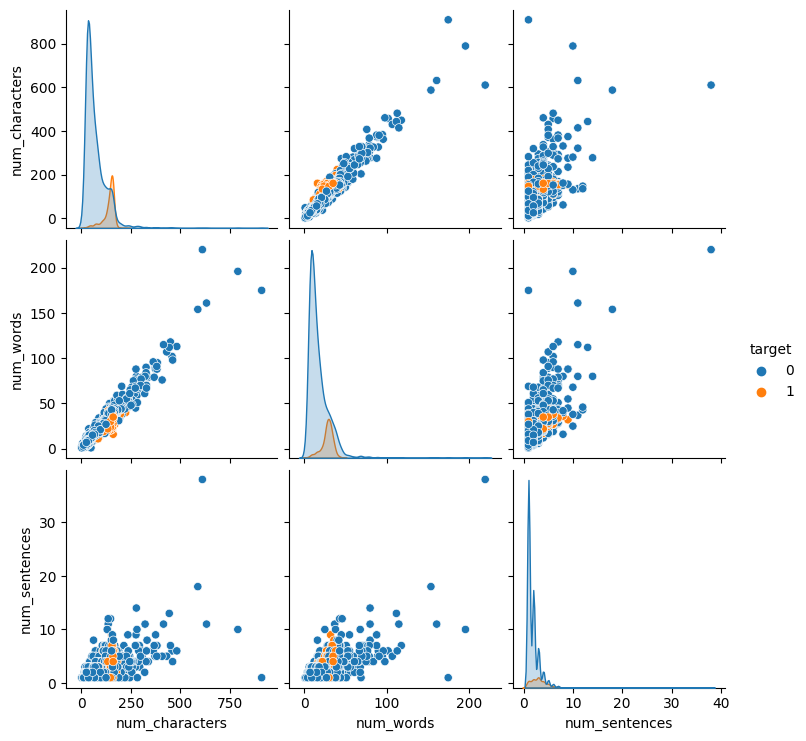

In [33]:
sns.pairplot(df,hue="target")

In [34]:
import string

In [35]:
def transform_text(text):
    text = nltk.word_tokenize(text.lower())
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
      
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [36]:
transform_text("Hi how  $% are you crediting")

NameError: name 'stopwords' is not defined

In [41]:
from nltk.corpus import stopwords

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [45]:
df["transform_text"] = df["text"].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height = 500,min_font_size = 10,background_color="white")

In [48]:
spam_wc = wc.generate(df[df["target"]==1]['transform_text'].str.cat(sep=" "))

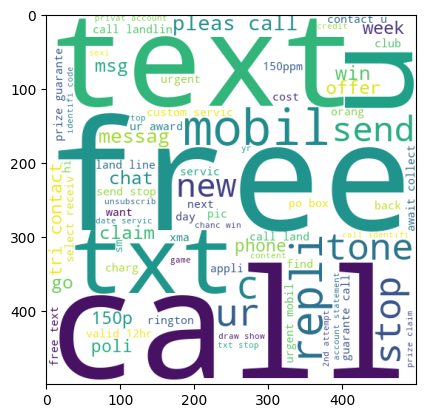

In [49]:
plt.imshow(spam_wc)

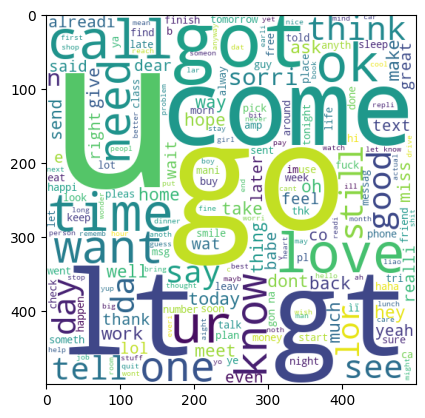

In [50]:
spam_wc = wc.generate(df[df["target"]==0]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [51]:
spam_corpus = []
for msg in df[df["target"] == 1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
len(spam_corpus)
from collections import Counter

In [62]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30)[1]))

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

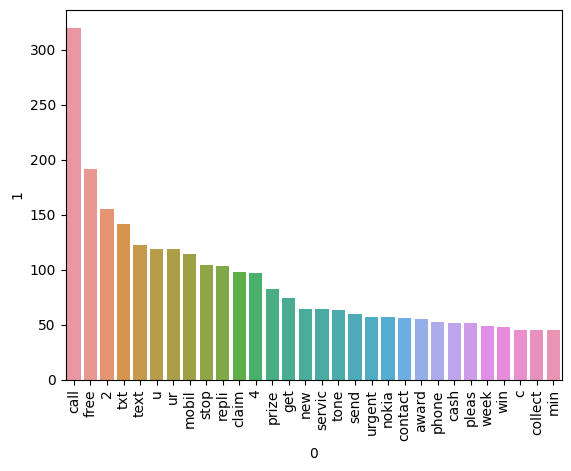

In [68]:
sns.barplot(x=0,y=1,data=new_df)
plt.xticks(rotation='vertical')
plt.show()

In [69]:
ham_corpus = []
for msg in df[df["target"] == 0]["transform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [70]:
len(ham_corpus)

35404

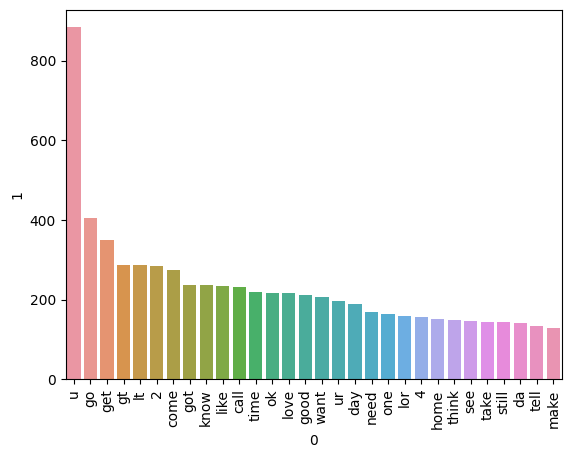

In [71]:
ddf = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=0,y=1,data=ddf)
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [91]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [92]:
x = tfidf.fit_transform(df["transform_text"]).toarray()

In [93]:
x.shape

(5169, 6708)

In [94]:
y = df["target"].values

In [95]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [98]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [99]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [100]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [101]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [102]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
